# Notebook ICD - 8

Install libraries via terminal o cmd

In [4]:
!pip install -U scikit-learn
!pip install umap-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 640.0 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.0 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.5/11.0 MB 4.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/11.0 MB 8.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.0 MB 9.6 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/11.0 MB 12.4 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/11.0 MB 14.8 MB/s eta 0:00:01
   ------------------ --------------------- 5.1/11.0 MB 14.7 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 15.4 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 16.1 MB/s eta 0:00:01
   ----------------------------- ---------- 8.0/11.0 MB 16.6 MB/s eta 0:00:01
   -------------------------------- ------- 9.0/11.0 MB 17.0 MB/s eta 0:00:

In [6]:
pip install umap-learn

Import functions

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data

In [10]:
df = pd.read_csv("sign_mnist_train.csv")
print(df.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [12]:
print(df.shape)

(27455, 785)


In [14]:
letter2encode = {'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'K': 10,'L': 11,'M': 12,
                'N': 13,'O': 14,'P': 15,'Q': 16,'R': 17,'S': 18,'T': 19,'U': 20,'V': 21,'W': 22,'X': 23, 'Y': 24}

def encode(character):
    return letter2encode[character]

In [16]:
WORD = 'ABC'
word = np.array(list(WORD))
embedded_word = list(map(encode, word))
print(embedded_word)

[0, 1, 2]


In [18]:
reduced_df = df[df['label'].isin(embedded_word)]
print(reduced_df.shape)

(3280, 785)


In [20]:
X = reduced_df.loc[:, reduced_df.columns != 'label'].values
print(len(X))

3280


In [22]:
y = reduced_df['label'].values
print(len(y))

3280


In [24]:
#print(X)
print(y)

[2 2 1 ... 2 1 0]


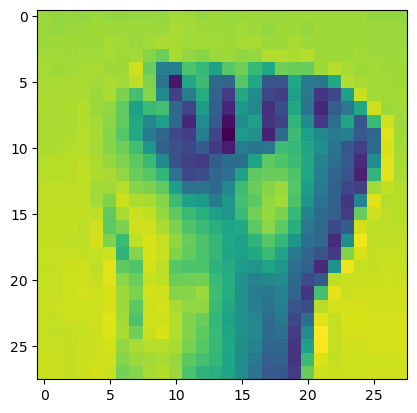

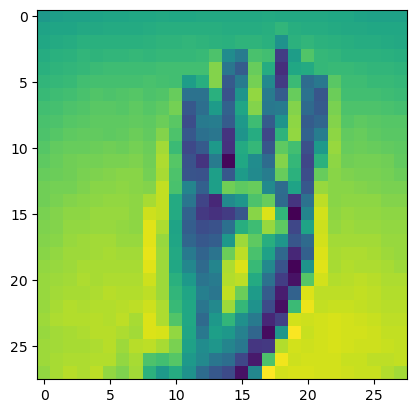

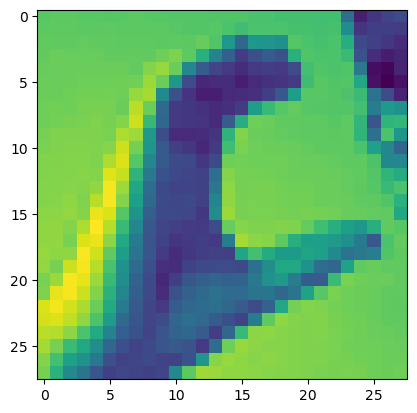

In [26]:
index = 0
for i in embedded_word:
    find = np.where(y == embedded_word[index])
    plt.imshow(X[find[0][0]].reshape(28,28))
    plt.show()
    index+=1

### Libraries of DR techniques

In [28]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP

## PCA

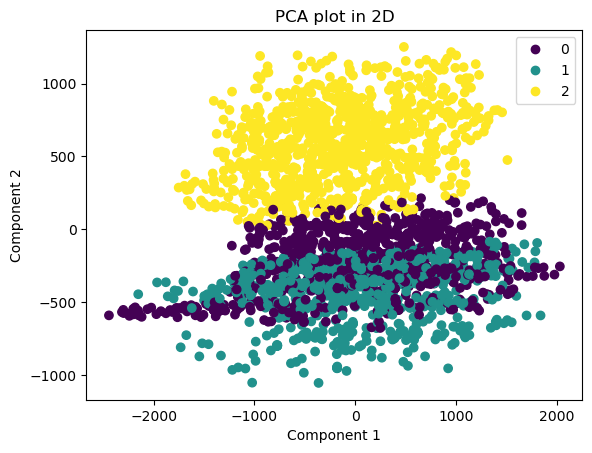

In [30]:
X_PCA = PCA(n_components=2).fit_transform(X)

scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y)
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

## LDA

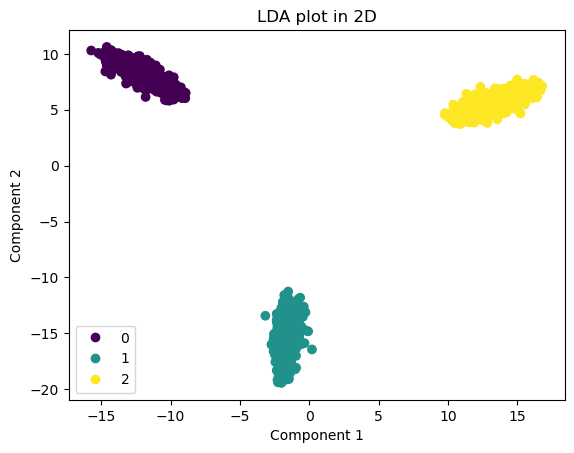

In [32]:
X_LDA = LDA(n_components=2).fit_transform(X,y)

scatter = plt.scatter(X_LDA[:,0], X_LDA[:,1], c=y)
plt.title('LDA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

## t-SNE

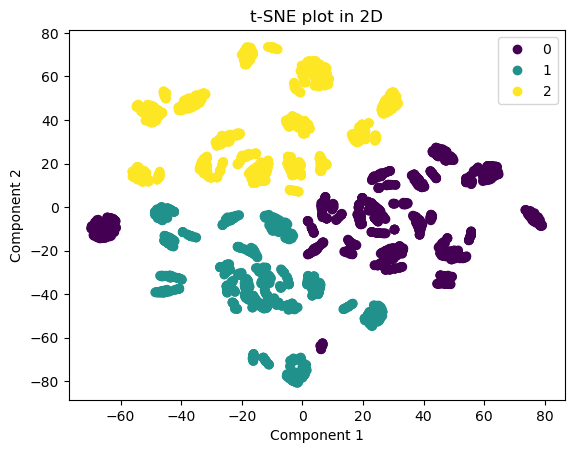

In [34]:
X_TSNE = TSNE(n_components=2).fit_transform(X)

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y)
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

## UMAP

D:\Documentos\PHYTON\Phyton programa\1 CSharp\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


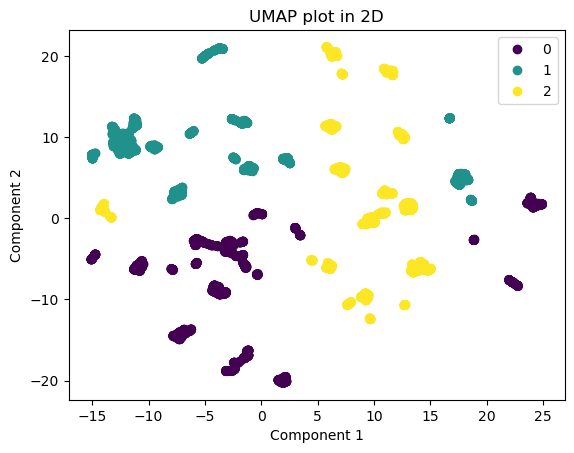

In [35]:
X_UMAP = UMAP(n_components=2).fit_transform(X, y)

scatter = plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y)
plt.title('UMAP plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()